In [2]:
!pip install wordcloud

In [3]:
!pip install NRCLex

In [4]:
import tweepy
from textblob import TextBlob
from nrclex import NRCLex
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [5]:
from wordcloud import WordCloud

In [6]:
consumer_key="3KuxgG3gWjDIOMgrJDlbsKpJ2"
consumer_secret="RpVLaLLgI5B8CLBXcwGYExM8Lt9UJTwsoJtHU6NtCHH2wI1Hb3"
access_token="1458087584551342090-l0uWSDFzSn2lnDkO3BOFveiqTfpc5P"
access_token_secret="xI2Hvn5uK7phyI4f6S78IRyeiTa9uMtNHB7ZgTob7Eyh5"

In [7]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth)

In [8]:
posts = api.user_timeline(screen_name="COVIDNewsByMIB", count = 1000
                          , lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 1000 recent tweets:\n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


Unexpected parameter: lang


Show the 1000 recent tweets:

1) #IndiaFightsCorona:

📍The fight is still on, it's time to defeat #Omicron.

☑️Common symptoms of Omicron👇

➡️SORE THROAT
➡️TIREDNESS
➡️BODY ACHE
➡️FEVER

🛡️Keep following #COVIDAppropriateBehaviour and get yourself fully vaccinated.

#Unite2FightCorona 
#StaySafeStayHealthy https://t.co/B6cpHeRG6i

2) RT @Anurag_Office: कोविड 19 के खिलाफ लड़ाई में युवा भारत एकजुट है। 15 से 17 वर्ष के बच्चों के टीकाकरण अभियान को लेकर बच्चों में बेहद उत्साह…

3) #IndiaFightsCorona:

#𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀𝐓𝐄

➡️ More than 156.71 Cr vaccine doses provided to States/UTs

➡️ More than 17.11 Cr doses still available with States/UTs to be administered

Details: https://t.co/qv7iEOgMVm

#We4Vaccine
#Unite2FightCorona https://t.co/HLeZPlub8W

4) RT @MoHFW_INDIA: #CoronaVirusUpdates

Media Briefing on #COVID19 by the Health Ministry will be held tomorrow, 12th January 2022, at 4 pm a…

5) #IndiaFightsCorona:

➡️ Over 69.31 Cr COVID Tests conducted so far.

➡️ Weekly Positivity 

In [9]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df

,Tweets
0,"#IndiaFightsCorona:\n\n📍The fight is still on,..."
1,RT @Anurag_Office: कोविड 19 के खिलाफ लड़ाई में...
2,#IndiaFightsCorona:\n\n#𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏...
3,RT @MoHFW_INDIA: #CoronaVirusUpdates\n\nMedia ...
4,#IndiaFightsCorona:\n\n➡️ Over 69.31 Cr COVID ...
...,...
195,#IndiaFightsCorona:\n\n#COVID19 UPDATE (As on ...
196,#IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 #𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓...
197,RT @MoHFW_INDIA: #Unite2FightCorona \n#Largest...
198,#IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 #𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓...


In [10]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"IndiaFightsCorona:\n\n📍The fight is still on, ..."
1,_Office: कोविड 19 के खिलाफ लड़ाई में युवा भारत...
2,IndiaFightsCorona:\n\n𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀...
3,_INDIA: CoronaVirusUpdates\n\nMedia Briefing o...
4,IndiaFightsCorona:\n\n➡️ Over 69.31 Cr COVID T...
...,...
195,IndiaFightsCorona:\n\nCOVID19 UPDATE (As on 5t...
196,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...
197,_INDIA: Unite2FightCorona \nLargestVaccineDriv...
198,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...


In [11]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity and emotion_list
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity







# Create two new columns 'Subjectivity' , 'Polarity' &'emotion_list'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)





# Show the new dataframe with columns 'Subjectivity' & 'Polarity' & 'emotion_list'
df

,Tweets,Subjectivity,Polarity
0,"IndiaFightsCorona:\n\n📍The fight is still on, ...",0.100000,0.000000
1,_Office: कोविड 19 के खिलाफ लड़ाई में युवा भारत...,0.000000,0.000000
2,IndiaFightsCorona:\n\n𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀...,0.466667,0.466667
3,_INDIA: CoronaVirusUpdates\n\nMedia Briefing o...,0.000000,0.000000
4,IndiaFightsCorona:\n\n➡️ Over 69.31 Cr COVID T...,0.466667,0.033333
...,...,...,...
195,IndiaFightsCorona:\n\nCOVID19 UPDATE (As on 5t...,0.173737,0.045455
196,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...,0.000000,0.000000
197,_INDIA: Unite2FightCorona \nLargestVaccineDriv...,0.000000,0.000000
198,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...,0.000000,0.000000


In [12]:
df['emotions']=df['Tweets'].apply(lambda x:NRCLex(x).affect_frequencies)
df

,Tweets,Subjectivity,Polarity,emotions
0,"IndiaFightsCorona:\n\n📍The fight is still on, ...",0.100000,0.000000,"{'fear': 0.14285714285714285, 'anger': 0.14285..."
1,_Office: कोविड 19 के खिलाफ लड़ाई में युवा भारत...,0.000000,0.000000,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
2,IndiaFightsCorona:\n\n𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀...,0.466667,0.466667,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
3,_INDIA: CoronaVirusUpdates\n\nMedia Briefing o...,0.000000,0.000000,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
4,IndiaFightsCorona:\n\n➡️ Over 69.31 Cr COVID T...,0.466667,0.033333,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
...,...,...,...,...
195,IndiaFightsCorona:\n\nCOVID19 UPDATE (As on 5t...,0.173737,0.045455,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
196,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...,0.000000,0.000000,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
197,_INDIA: Unite2FightCorona \nLargestVaccineDriv...,0.000000,0.000000,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."
198,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...,0.000000,0.000000,"{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 't..."


In [13]:
df=pd.concat([df.drop(['emotions'], axis=1),df['emotions'].apply(pd.Series)], axis=1)
df

,Tweets,Subjectivity,Polarity,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,"IndiaFightsCorona:\n\n📍The fight is still on, ...",0.100000,0.000000,0.142857,0.142857,0.0,0.142857,0.0,0.142857,0.285714,0.0,0.0,0.0,0.142857
1,_Office: कोविड 19 के खिलाफ लड़ाई में युवा भारत...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN
2,IndiaFightsCorona:\n\n𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀...,0.466667,0.466667,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,NaN
3,_INDIA: CoronaVirusUpdates\n\nMedia Briefing o...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000
4,IndiaFightsCorona:\n\n➡️ Over 69.31 Cr COVID T...,0.466667,0.033333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,IndiaFightsCorona:\n\nCOVID19 UPDATE (As on 5t...,0.173737,0.045455,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000
196,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.500000,0.000000,0.0,0.0,0.0,NaN
197,_INDIA: Unite2FightCorona \nLargestVaccineDriv...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN
198,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN


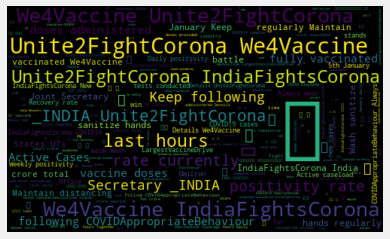

In [14]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [15]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,Analysis
0,"IndiaFightsCorona:\n\n📍The fight is still on, ...",0.100000,0.000000,0.142857,0.142857,0.0,0.142857,0.0,0.142857,0.285714,0.0,0.0,0.0,0.142857,Neutral
1,_Office: कोविड 19 के खिलाफ लड़ाई में युवा भारत...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,Neutral
2,IndiaFightsCorona:\n\n𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀...,0.466667,0.466667,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,NaN,Positive
3,_INDIA: CoronaVirusUpdates\n\nMedia Briefing o...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,Neutral
4,IndiaFightsCorona:\n\n➡️ Over 69.31 Cr COVID T...,0.466667,0.033333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,IndiaFightsCorona:\n\nCOVID19 UPDATE (As on 5t...,0.173737,0.045455,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,Positive
196,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.500000,0.000000,0.0,0.0,0.0,NaN,Neutral
197,_INDIA: Unite2FightCorona \nLargestVaccineDriv...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,Neutral
198,IndiaFightsCorona:\n\n📍𝑰𝒏𝒅𝒊𝒂'𝒔 𝑽𝒂𝒄𝒄𝒊𝒏𝒂𝒕𝒊𝒐𝒏𝑫𝒓𝒊𝒗...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,Neutral


In [16]:
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) IndiaFightsCorona:

➡️ India's Active Caseload currently at 8,21,446. 

➡️ Active Cases presently constitute 2.29% of Total Cases.

Unite2FightCorona 
We4Vaccine 

2) IndiaFightsCorona:

📍COVID19 Active Cases in India (As on 11th January, 2022): 8,21,446

✅Keep following COVIDAppropriateBehaviour 

➡️Always wear a mask
➡️Wash/sanitize hands regularly
➡️Maintain distancing
➡️Get yourself fully vaccinated

We4Vaccine
Unite2FightCorona 

3) IndiaFightsCorona:

➡️ India's Active Caseload currently at 7,23,619.

➡️ Active Cases presently constitute 2.03% of Total Cases.

We4Vaccine 
Unite2FightCorona 

4) 📍PrecautionDose for healthcare workers, frontline workers &amp; senior citizens aged 60 years or above with comorbidities, being administered from today, 10th January, 2022.

🛡️The fight is still on, it's time to defeat Omicron.

IndiaFightsCorona We4Vaccine LargestVaccineDrive 

5) IndiaFightsCorona:

📍COVID19 Active Cases in India (As on 10th January, 2022):

In [17]:
print('Printing Positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=True) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing Positive tweets:

1) IndiaFightsCorona:

𝐂𝐎𝐕𝐈𝐃𝟏𝟗 𝐕𝐚𝐜𝐜𝐢𝐧𝐚𝐭𝐢𝐨𝐧 𝐔𝐏𝐃𝐀𝐓𝐄

➡️ More than 156.71 Cr vaccine doses provided to States/UTs

➡️ More than 17.11 Cr doses still available with States/UTs to be administered

Details: 

We4Vaccine
Unite2FightCorona 

2) IndiaFightsCorona:

➡️ Over 69.31 Cr COVID Tests conducted so far.

➡️ Weekly Positivity Rate currently at 8.85%.

➡️ Daily Positivity Rate stands at 10.64%.

Details: 

Unite2FightCorona 
We4Vaccine 

3) IndiaFightsCorona:

➡️ 1,68,063 New Cases reported in last 24 hours.

Unite2FightCorona 
We4Vaccine 

4) IndiaFightsCorona:

➡️ India’s Cumulative COVID19 Vaccination Coverage exceeds 152.89 Cr (1,52,89,70,294).

➡️ More than 92 Lakh doses administered in the last 24 hours.

➡️ More than 9 lakh Precaution Doses administered yesterday.

Unite2FightCorona 
We4Vaccine 

5) IndiaFightsCorona : 

➡️69,959 patients recovered during last 24 hours 

➡️3.45 crore total recoveries across the country so far 

➡️Recovery rate currently a

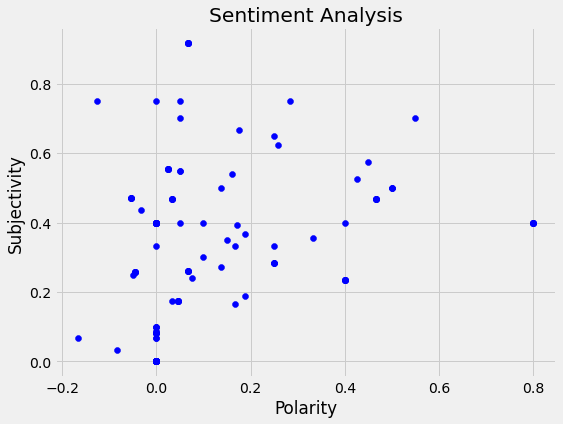

In [18]:
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [19]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

43.5

In [20]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

43.5

In [21]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

8.5

In [22]:
# Show the value counts
df['Analysis'].value_counts()

Neutral     96
Positive    87
Negative    17
Name: Analysis, dtype: int64

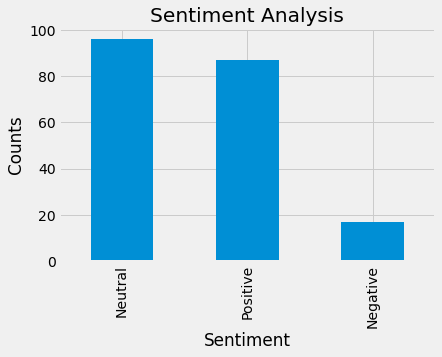

In [23]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

In [24]:
!pip install scikit-learn

In [25]:
!pip install sklearn

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
df['Tweets']=le.fit_transform(df['Tweets'])
df.head()

,Tweets,Subjectivity,Polarity,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,Analysis
0,126,0.100000,0.000000,0.142857,0.142857,0.0,0.142857,0.0,0.142857,0.285714,0.0,0.0,0.0,0.142857,Neutral
1,179,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,Neutral
2,79,0.466667,0.466667,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,NaN,Positive
3,152,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,Neutral
4,61,0.466667,0.033333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,Positive


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
df['Analysis'] = le.fit_transform(df['Analysis'])

In [30]:
df.columns

Index(['Tweets', 'Subjectivity', 'Polarity', 'fear', 'anger', 'anticip',
       'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust',
       'joy', 'anticipation', 'Analysis'],
      dtype='object')

In [31]:
df.drop('anticipation',axis=1,inplace=True)
df.head()

,Tweets,Subjectivity,Polarity,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,Analysis
0,126,0.100000,0.000000,0.142857,0.142857,0.0,0.142857,0.0,0.142857,0.285714,0.0,0.0,0.0,1
1,179,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1
2,79,0.466667,0.466667,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,2
3,152,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1
4,61,0.466667,0.033333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,2


In [32]:
df.Analysis

0      1
1      1
2      2
3      1
4      2
      ..
195    2
196    1
197    1
198    1
199    1
Name: Analysis, Length: 200, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=df.drop(columns=['Analysis'])
y=df['Analysis']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

                                                 

In [35]:
len(x_train)

140

In [36]:
len(x_test)

60

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
import random

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
print("accuracy: ",model.score(x_test,y_test)*100)

accuracy:  55.229082921061156


In [40]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()


In [41]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
print("accuracy: ",model.score(x_test,y_test)*100)

accuracy:  68.33333333333333


In [43]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [44]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
print("accuracy: ",model.score(x_test,y_test)*100)

accuracy:  100.0


In [46]:

from sklearn.naive_bayes import GaussianNB

In [47]:
model= GaussianNB()

In [48]:
model.fit(x_train,y_train)

GaussianNB()

In [49]:
print("accuracy: ",model.score(x_test,y_test)*100)

accuracy:  81.66666666666667


In [50]:
posts = api.user_timeline(screen_name="coronaextrausa", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 1000  tweets:\n")
i=1
for tweet in posts:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


Unexpected parameter: lang


Show the 1000  tweets:

1) @NateHillTV 🔥🍻

2) #InsteadOfResolutionsIm https://t.co/aCaNuyuE60

3) Just a couple of citruses #vibingtogether https://t.co/tQ8RstyGXy

4) @DeerHoagie @GlennJacobsTN Beautiful tradition, thank you for sharing ❤️🎄

5) RT @OwnByFemme: I’ve been traveling nonstop and haven’t had much time to enjoy the holiday season! I’m treating myself a little Christmas m…

6) @xSCARFACEx907x Awesome! Cheers 🎄🍻

7) 🍻🎄 https://t.co/GOHIuorxYl

8) RT @FaZeClan: So who needs this fridge?

It’s the final week to enter the @coronaextrausa Happy Holidays Sweeps! Enter now until 12/24 at 1…

9) @FaZeMew ❤️🎉❤️

10) RT @FaZeClan: Doesn't matter if you're inside or outside the game - no one's got moves like @FaZeMew 🕺

@coronaextrausa | #CoronaHardSeltze…

11) Gather ‘round the ol’ palm tree to sing our classic holiday tune. https://t.co/7REwaI8lYX

12) @Swagg 🎄🍻

13) On #NationalBartenderDay give your bartender a break, just order a Corona.

14) @TheBoiSantana 🍻🥳🥳🥳

15) @saratouf htt

In [51]:
df2 = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df2

,Tweets
0,@NateHillTV 🔥🍻
1,#InsteadOfResolutionsIm https://t.co/aCaNuyuE60
2,Just a couple of citruses #vibingtogether http...
3,@DeerHoagie @GlennJacobsTN Beautiful tradition...
4,RT @OwnByFemme: I’ve been traveling nonstop an...
...,...
195,@textiff Cheers! 🍻
196,@NRAEF Let's do this 🍻🎉
197,@MisterrPenguin @zoesaldana Same 🍻
198,@JordanYorkMusic Same! 🍻🥳


In [52]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df2['Tweets'] = df2['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df2

,Tweets
0,🔥🍻
1,InsteadOfResolutionsIm
2,Just a couple of citruses vibingtogether
3,"Beautiful tradition, thank you for sharing ❤️🎄"
4,: I’ve been traveling nonstop and haven’t had ...
...,...
195,Cheers! 🍻
196,Let's do this 🍻🎉
197,Same 🍻
198,Same! 🍻🥳


In [53]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity and emotion_list
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity







# Create two new columns 'Subjectivity' , 'Polarity' &'emotion_list'
df2['Subjectivity'] = df2['Tweets'].apply(getSubjectivity)
df2['Polarity'] = df2['Tweets'].apply(getPolarity)





# Show the new dataframe with columns 'Subjectivity' & 'Polarity' & 'emotion_list'
df2

,Tweets,Subjectivity,Polarity
0,🔥🍻,0.000000,0.000000
1,InsteadOfResolutionsIm,0.000000,0.000000
2,Just a couple of citruses vibingtogether,0.000000,0.000000
3,"Beautiful tradition, thank you for sharing ❤️🎄",1.000000,0.850000
4,: I’ve been traveling nonstop and haven’t had ...,0.400000,0.170833
...,...,...,...
195,Cheers! 🍻,0.000000,0.000000
196,Let's do this 🍻🎉,0.000000,0.000000
197,Same 🍻,0.125000,0.000000
198,Same! 🍻🥳,0.125000,0.000000


In [54]:
def getAnalysis2(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df2['Analysis2'] = df2['Polarity'].apply(getAnalysis)
# Show the dataframe
df2

,Tweets,Subjectivity,Polarity,Analysis2
0,🔥🍻,0.000000,0.000000,Neutral
1,InsteadOfResolutionsIm,0.000000,0.000000,Neutral
2,Just a couple of citruses vibingtogether,0.000000,0.000000,Neutral
3,"Beautiful tradition, thank you for sharing ❤️🎄",1.000000,0.850000,Positive
4,: I’ve been traveling nonstop and haven’t had ...,0.400000,0.170833,Positive
...,...,...,...,...
195,Cheers! 🍻,0.000000,0.000000,Neutral
196,Let's do this 🍻🎉,0.000000,0.000000,Neutral
197,Same 🍻,0.125000,0.000000,Neutral
198,Same! 🍻🥳,0.125000,0.000000,Neutral


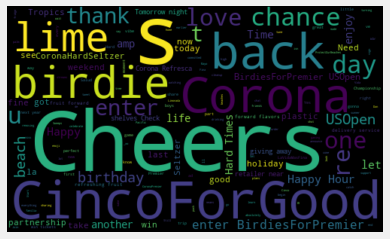

In [55]:
# word cloud visualization
allWords = ' '.join([twts for twts in df2['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [56]:
ptweets = df2[df2.Analysis2 == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df2.shape[0]) * 100 , 1)

35.5

In [57]:
ntweets = df2[df2.Analysis2== 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df2.shape[0]) * 100, 1)

6.0

In [58]:
# Show the value counts
df2['Analysis2'].value_counts()

Neutral     117
Positive     71
Negative     12
Name: Analysis2, dtype: int64

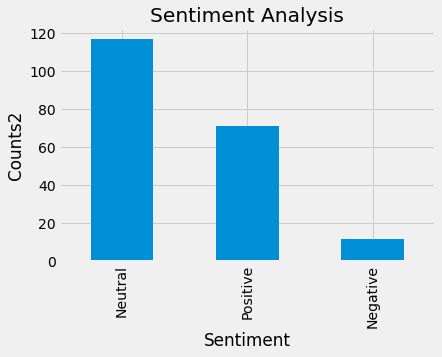

In [59]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts2')
df2['Analysis2'].value_counts().plot(kind = 'bar')
plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
df2['Analysis2'] = le.fit_transform(df2['Analysis2'])

In [62]:
df2.columns

Index(['Tweets', 'Subjectivity', 'Polarity', 'Analysis2'], dtype='object')

In [63]:
df2.Analysis2

0      1
1      1
2      1
3      2
4      2
      ..
195    1
196    1
197    1
198    1
199    2
Name: Analysis2, Length: 200, dtype: int32

In [64]:
df.columns

Index(['Tweets', 'Subjectivity', 'Polarity', 'fear', 'anger', 'anticip',
       'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust',
       'joy', 'Analysis'],
      dtype='object')

In [65]:
df.Analysis
df.head()

,Tweets,Subjectivity,Polarity,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,Analysis
0,126,0.100000,0.000000,0.142857,0.142857,0.0,0.142857,0.0,0.142857,0.285714,0.0,0.0,0.0,1
1,179,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1
2,79,0.466667,0.466667,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,2
3,152,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1
4,61,0.466667,0.033333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,2


In [66]:
df2.columns

Index(['Tweets', 'Subjectivity', 'Polarity', 'Analysis2'], dtype='object')

In [67]:
df2.Analysis2
df2.head()

,Tweets,Subjectivity,Polarity,Analysis2
0,🔥🍻,0.0,0.000000,1
1,InsteadOfResolutionsIm,0.0,0.000000,1
2,Just a couple of citruses vibingtogether,0.0,0.000000,1
3,"Beautiful tradition, thank you for sharing ❤️🎄",1.0,0.850000,2
4,: I’ve been traveling nonstop and haven’t had ...,0.4,0.170833,2


In [68]:
pd.concat([df,df2],sort=False)

,Tweets,Subjectivity,Polarity,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,Analysis,Analysis2
0,126,0.100000,0.000000,0.142857,0.142857,0.0,0.142857,0.0,0.142857,0.285714,0.0,0.0,0.0,1.0,NaN
1,179,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,NaN
2,79,0.466667,0.466667,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,2.0,NaN
3,152,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,NaN
4,61,0.466667,0.033333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Cheers! 🍻,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
196,Let's do this 🍻🎉,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
197,Same 🍻,0.125000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
198,Same! 🍻🥳,0.125000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [69]:
pp=['Analysis','Analysis2']

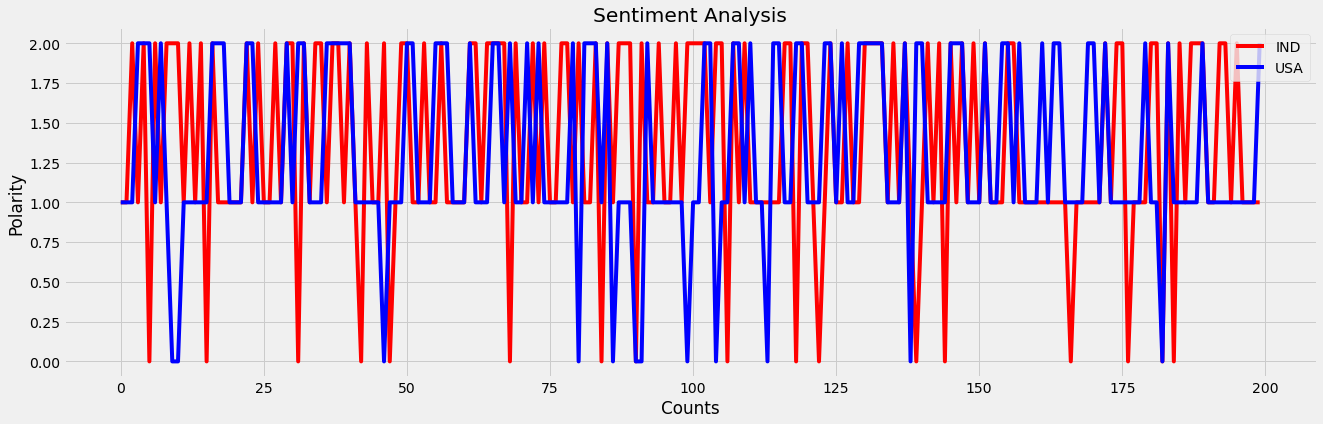

In [70]:
from matplotlib import rcParams
rcParams['figure.figsize']=20,6
plt.title('Sentiment Analysis')
plt.xlabel('Counts')
plt.ylabel('Polarity')

plt.plot(df.Analysis,color='r', label='IND')
plt.plot(df2.Analysis2,color='b',label='USA')
plt.grid(True)
plt.legend(loc=1)




In [71]:
posts = api.user_timeline(screen_name="PMBhutan", count = 200, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 1000  tweets:\n")
i=1
for tweet in posts:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


Unexpected parameter: lang


Show the 1000  tweets:

1) This is to inform everyone that four positive COVID-19 cases were detected in the community in Samdrupjongkhar. There are also evidences of local contacts.

Therefore, we are declaring 𝐢𝐦𝐦𝐞𝐝𝐢𝐚𝐭𝐞 𝟕𝟐 𝐡𝐨𝐮𝐫𝐬 𝐛𝐥𝐚𝐜𝐤𝐨𝐮𝐭 𝐩𝐞𝐫𝐢𝐨𝐝 in Samdrupjongkhar town. https://t.co/wnXQYbyqY6

2) Dear friends,

By now you must have heard about one resident in Phuentsholing testing positive for COVID-19.

As Phuentsholing initiates immediate 24 hours “blackout” for further investigation, I write to you all to be aware and maintain highest caution.

https://t.co/pg8pbhW5yz https://t.co/sFznpYf9b8

3) While welcoming the new year with our family and friends, I pray it becomes a valuable one that we will cherish for lifetime.

https://t.co/ASbtZBTSUT https://t.co/AGkrefBonX

4) The year ended with the conduct of 45th Meet the Press session.

Post session, the Prime Minister, Cabinet ministers and media fraternity come together to wish everyone a Happy New year. https://t.co/8coKNfwg6I

5

In [72]:
df4 = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df4

,Tweets
0,This is to inform everyone that four positive ...
1,"Dear friends,\n\nBy now you must have heard ab..."
2,While welcoming the new year with our family a...
3,The year ended with the conduct of 45th Meet t...
4,Public institutions in Dzongkhags that are exp...
...,...
195,A nationwide lockdown will be enforced for sev...
196,Prime Minister updates the nation on COVID-19 ...
197,Prime Minister Dr Lotay Tshering will update t...
198,As the number of contacts increase by the hour...


In [73]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity and emotion_list
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity







# Create two new columns 'Subjectivity' , 'Polarity' &'emotion_list'
df4['Subjectivity'] = df4['Tweets'].apply(getSubjectivity)
df4['Polarity'] = df4['Tweets'].apply(getPolarity)





# Show the new dataframe with columns 'Subjectivity' & 'Polarity' & 'emotion_list'
df4

,Tweets,Subjectivity,Polarity
0,This is to inform everyone that four positive ...,0.272727,0.113636
1,"Dear friends,\n\nBy now you must have heard ab...",0.431818,0.159091
2,While welcoming the new year with our family a...,0.454545,0.136364
3,The year ended with the conduct of 45th Meet t...,0.727273,0.468182
4,Public institutions in Dzongkhags that are exp...,0.283333,-0.100000
...,...,...,...
195,A nationwide lockdown will be enforced for sev...,0.233333,0.200000
196,Prime Minister updates the nation on COVID-19 ...,0.000000,0.000000
197,Prime Minister Dr Lotay Tshering will update t...,0.000000,0.000000
198,As the number of contacts increase by the hour...,0.472727,0.113636


In [74]:
def getAnalysis4(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df4['Analysis4'] = df4['Polarity'].apply(getAnalysis)
# Show the dataframe
df4

,Tweets,Subjectivity,Polarity,Analysis4
0,This is to inform everyone that four positive ...,0.272727,0.113636,Positive
1,"Dear friends,\n\nBy now you must have heard ab...",0.431818,0.159091,Positive
2,While welcoming the new year with our family a...,0.454545,0.136364,Positive
3,The year ended with the conduct of 45th Meet t...,0.727273,0.468182,Positive
4,Public institutions in Dzongkhags that are exp...,0.283333,-0.100000,Negative
...,...,...,...,...
195,A nationwide lockdown will be enforced for sev...,0.233333,0.200000,Positive
196,Prime Minister updates the nation on COVID-19 ...,0.000000,0.000000,Neutral
197,Prime Minister Dr Lotay Tshering will update t...,0.000000,0.000000,Neutral
198,As the number of contacts increase by the hour...,0.472727,0.113636,Positive


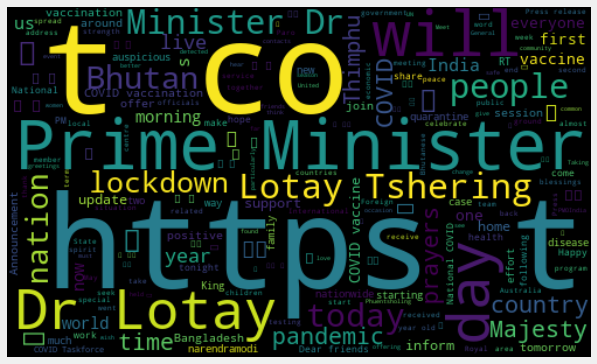

In [75]:
# word cloud visualization
allWords = ' '.join([twts for twts in df4['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [76]:
ptweets = df4[df4.Analysis4 == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df4.shape[0]) * 100 , 1)

62.5

In [77]:
ntweets = df4[df4.Analysis4== 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df4.shape[0]) * 100, 1)

10.0

In [78]:
# Show the value counts
df4['Analysis4'].value_counts()

Positive    125
Neutral      55
Negative     20
Name: Analysis4, dtype: int64

In [79]:
posts = api.user_timeline(screen_name="alliance4nep", count = 200, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 200  tweets:\n")
i=1
for tweet in posts:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


Unexpected parameter: lang


Show the 200  tweets:

1) RT @mohpnep: https://t.co/tW5Pot1wku

2) RT @alliance4nepuk: A welcome news for the people in Nepal waiting for their Covid19 vaccines. We still have hope that the UK will step up…

3) Thank you @MikeAmesburyMP for being Nepal's friend. https://t.co/P5IWiwxGeq

4) RT @MikeAmesburyMP: Nepal urgently needs help to fight Covid. It has the world's highest transmission rate &amp; isn't getting vaccines fast en…

5) Don't forget to call us at our hotline 9880035000 for FREE teleconsultation regarding your child's health!

We are grateful to have Dr.Smriti Mathema, Pediatric Care Specialist with us! 🙏

@smritimathema 
#covidhotline https://t.co/OYvUnCdoMT

6) We encourage you to call our hotline number, 9880035000, to get FREE covid-related medical consultation for your specific conditions.

Our team of trained doctors and nurses will be at your service daily from 6am to 9pm.

#alliance4nepal 
#covidhotline https://t.co/eChvqIIqzJ

7) RT @bijayacharya: This 🧵 

💔😭

#

In [80]:
df5 = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df5

,Tweets
0,RT @mohpnep: https://t.co/tW5Pot1wku
1,RT @alliance4nepuk: A welcome news for the peo...
2,Thank you @MikeAmesburyMP for being Nepal's fr...
3,RT @MikeAmesburyMP: Nepal urgently needs help ...
4,Don't forget to call us at our hotline 9880035...
...,...
78,We submitted a letter to @USAmbNepal yesterday...
79,The recent announcement by the United States g...
80,Nepal now has one of the highest viral reprodu...
81,@erDocKharel on @BrianLehrer talking about nee...


In [81]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity and emotion_list
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity







# Create two new columns 'Subjectivity' , 'Polarity' &'emotion_list'
df5['Subjectivity'] = df5['Tweets'].apply(getSubjectivity)
df5['Polarity'] = df5['Tweets'].apply(getPolarity)





# Show the new dataframe with columns 'Subjectivity' & 'Polarity' & 'emotion_list'
df5

,Tweets,Subjectivity,Polarity
0,RT @mohpnep: https://t.co/tW5Pot1wku,0.000,0.000000
1,RT @alliance4nepuk: A welcome news for the peo...,0.900,0.800000
2,Thank you @MikeAmesburyMP for being Nepal's fr...,0.000,0.000000
3,RT @MikeAmesburyMP: Nepal urgently needs help ...,0.600,0.200000
4,Don't forget to call us at our hotline 9880035...,0.800,0.625000
...,...,...,...
78,We submitted a letter to @USAmbNepal yesterday...,0.000,0.000000
79,The recent announcement by the United States g...,0.505,0.135000
80,Nepal now has one of the highest viral reprodu...,0.600,0.272727
81,@erDocKharel on @BrianLehrer talking about nee...,0.000,0.000000


In [82]:
def getAnalysis5(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df5['Analysis5'] = df5['Polarity'].apply(getAnalysis)
# Show the dataframe
df5

,Tweets,Subjectivity,Polarity,Analysis5
0,RT @mohpnep: https://t.co/tW5Pot1wku,0.000,0.000000,Neutral
1,RT @alliance4nepuk: A welcome news for the peo...,0.900,0.800000,Positive
2,Thank you @MikeAmesburyMP for being Nepal's fr...,0.000,0.000000,Neutral
3,RT @MikeAmesburyMP: Nepal urgently needs help ...,0.600,0.200000,Positive
4,Don't forget to call us at our hotline 9880035...,0.800,0.625000,Positive
...,...,...,...,...
78,We submitted a letter to @USAmbNepal yesterday...,0.000,0.000000,Neutral
79,The recent announcement by the United States g...,0.505,0.135000,Positive
80,Nepal now has one of the highest viral reprodu...,0.600,0.272727,Positive
81,@erDocKharel on @BrianLehrer talking about nee...,0.000,0.000000,Neutral


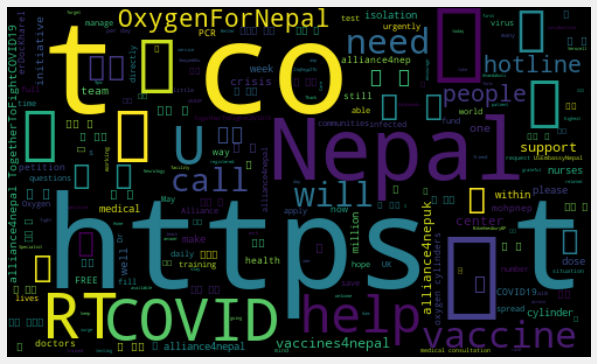

In [83]:
# word cloud visualization
allWords = ' '.join([twts for twts in df5['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [84]:
ptweets = df5[df5.Analysis5 == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df5.shape[0]) * 100 , 1)

42.2

In [85]:
ntweets = df5[df5.Analysis5== 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df5.shape[0]) * 100, 1)

4.8

In [86]:
# Show the value counts
df5['Analysis5'].value_counts()

Neutral     44
Positive    35
Negative     4
Name: Analysis5, dtype: int64

In [87]:
posts = api.user_timeline(screen_name="nhsrcofficial", count = 200,lang ="en",  tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 200  tweets:\n")
i=1
for tweet in posts:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1


Unexpected parameter: lang


Show the 200  tweets:

1) Pakistan: Daily update on #coronavirus cases

• 43,540 tests conducted in the last 24 hours
• 1467 people tested #COVID19 positive
• Positivity Ratio is 3.33 %
• Number of deaths is 2
• Patients on Critical Care 615

#DailyCovidUpdate https://t.co/tBfOiTtvUf

2) RT @usembislamabad: This week, the United States donated an additional 4.9 million Pfizer vaccine doses via #COVAX to Pakistan. The United…

3) Pakistan: Daily update on #vaccine doses administered

Total doses administered till now: 161.4 million
Doses administered in last 24 hours: 7.58 Lakh https://t.co/fZPuvQnQO0

4) Pakistan: Daily update on #coronavirus cases

• 51,145 tests conducted in the last 24 hours
• 1293 people tested #COVID19 positive
• Positivity Ratio is 2.52 %
• Number of deaths is 6
• Patients on Critical Care 609
• Total Active Cases 14,094

#DailyCovidUpdate https://t.co/bfblJzXd5A

5) بچوں کے لیےمعمولاتِ زندگی اورتعلیم کی جانب حفاظت سےلوٹنا انتہائی ضروری ہے۔آج ہی 12سال سےزائدعمرکے

In [88]:
df6 = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df6

,Tweets
0,Pakistan: Daily update on #coronavirus cases\n...
1,"RT @usembislamabad: This week, the United Stat..."
2,Pakistan: Daily update on #vaccine doses admin...
3,Pakistan: Daily update on #coronavirus cases\n...
4,بچوں کے لیےمعمولاتِ زندگی اورتعلیم کی جانب حفا...
...,...
195,"Dr. Rubina Sohail, who has over 17 years of ex..."
196,Pakistan is set to launch largest Measles-Rube...
197,Pakistan: Daily update on #coronavirus cases\n...
198,Pakistan: Daily update on #vaccine doses admin...


In [89]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity and emotion_list
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity







# Create two new columns 'Subjectivity' , 'Polarity' &'emotion_list'
df6['Subjectivity'] = df6['Tweets'].apply(getSubjectivity)
df6['Polarity'] = df6['Tweets'].apply(getPolarity)





# Show the new dataframe with columns 'Subjectivity' & 'Polarity' & 'emotion_list'
df6

,Tweets,Subjectivity,Polarity
0,Pakistan: Daily update on #coronavirus cases\n...,0.353030,0.056818
1,"RT @usembislamabad: This week, the United Stat...",0.000000,0.000000
2,Pakistan: Daily update on #vaccine doses admin...,0.272222,0.000000
3,Pakistan: Daily update on #coronavirus cases\n...,0.460354,0.015657
4,بچوں کے لیےمعمولاتِ زندگی اورتعلیم کی جانب حفا...,0.000000,0.000000
...,...,...,...
195,"Dr. Rubina Sohail, who has over 17 years of ex...",0.700000,0.358333
196,Pakistan is set to launch largest Measles-Rube...,0.000000,0.000000
197,Pakistan: Daily update on #coronavirus cases\n...,0.392424,0.018788
198,Pakistan: Daily update on #vaccine doses admin...,0.272222,0.000000


In [90]:
def getAnalysis6(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df6['Analysis6'] = df6['Polarity'].apply(getAnalysis)
# Show the dataframe
df6

,Tweets,Subjectivity,Polarity,Analysis6
0,Pakistan: Daily update on #coronavirus cases\n...,0.353030,0.056818,Positive
1,"RT @usembislamabad: This week, the United Stat...",0.000000,0.000000,Neutral
2,Pakistan: Daily update on #vaccine doses admin...,0.272222,0.000000,Neutral
3,Pakistan: Daily update on #coronavirus cases\n...,0.460354,0.015657,Positive
4,بچوں کے لیےمعمولاتِ زندگی اورتعلیم کی جانب حفا...,0.000000,0.000000,Neutral
...,...,...,...,...
195,"Dr. Rubina Sohail, who has over 17 years of ex...",0.700000,0.358333,Positive
196,Pakistan is set to launch largest Measles-Rube...,0.000000,0.000000,Neutral
197,Pakistan: Daily update on #coronavirus cases\n...,0.392424,0.018788,Positive
198,Pakistan: Daily update on #vaccine doses admin...,0.272222,0.000000,Neutral


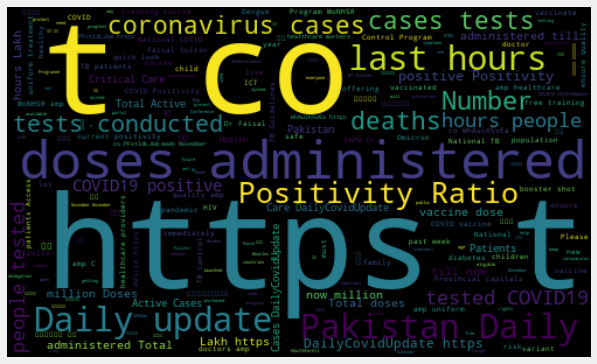

In [91]:
# word cloud visualization
allWords = ' '.join([twts for twts in df6['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [92]:
ptweets = df6[df6.Analysis6 == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df6.shape[0]) * 100 , 1)

54.5

In [93]:
ntweets = df6[df6.Analysis6== 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df6.shape[0]) * 100, 1)

5.5

In [94]:
# Show the value counts
df6['Analysis6'].value_counts()

Positive    109
Neutral      80
Negative     11
Name: Analysis6, dtype: int64

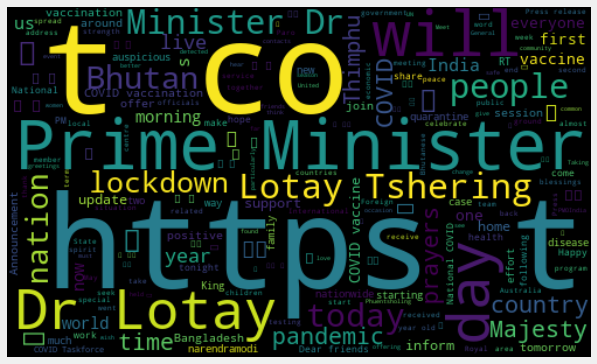

In [95]:
# word cloud visualization
allWords = ' '.join([twts for twts in df4['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

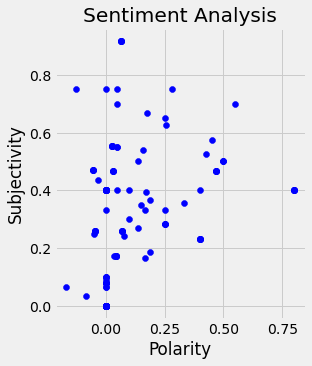

In [98]:
plt.figure(figsize=(4,5)) 
for i in range(0, df6.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

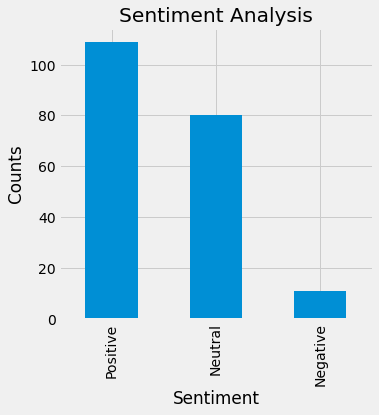

In [105]:
plt.figure(figsize=(5,5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df6['Analysis6'].value_counts().plot(kind = 'bar')
plt.show()
 